#Clone & Submodules


In [1]:
!git clone --recurse-submodules https://github.com/DhanvinG/Cataract-SAM2.git /content/Cataract-SAM2
%cd /content/Cataract-SAM2
!git submodule update --init --recursive

Cloning into '/content/Cataract-SAM2'...
remote: Enumerating objects: 662, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 662 (delta 155), reused 78 (delta 72), pack-reused 440 (from 1)
Receiving objects: 100% (662/662), 63.70 MiB | 45.05 MiB/s, done.
Resolving deltas: 100% (260/260), done.
Submodule 'sam2' (https://github.com/facebookresearch/segment-anything-2.git) registered for path 'segment_anything_2'
Cloning into '/content/Cataract-SAM2/segment_anything_2'...
remote: Enumerating objects: 1070, done.        
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)        
Receiving objects: 100% (1070/1070), 128.11 MiB | 47.72 MiB/s, done.
Resolving deltas: 100% (380/380), done.
Submodule path 'segment_anything_2': checked out '2b90b9f5ceec907a1c18123530e92e794ad901a4'
/content/Cataract-SAM2


#Install Dependencies

In [2]:
!pip install -e ./segment_anything_2
!pip install -e .

Obtaining file:///content/Cataract-SAM2/segment_anything_2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56

In [3]:
%cd /content/Cataract-SAM2/segment_anything_2
!python setup.py build_ext --inplace  -q

/content/Cataract-SAM2/segment_anything_2
running build_ext
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:529: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:448: UserWarning: The detected CUDA version (12.5) has a minor version mismatch with the version that was used to compile PyTorch (12.4). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:458: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.5
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'sam2._C' extension
creating build/temp.linux-x86_64

⚠️ Restart your runtime now. This ensures Hydra entry‑points and editable installs are registered correctly.

#Download Pretrained Weights

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/Cataract-SAM2
!python examples/download_checkpoints.py

/content/Cataract-SAM2
⇣ huggingface
Cataract-SAM2.pth: 100% 898M/898M [00:02<00:00, 307MB/s]
✔ downloaded → /content/Cataract-SAM2/checkpoints/Cataract-SAM2.pth


#Build the Predictor

In [22]:
from sam2.build_sam import build_sam2_video_predictor

pred = build_sam2_video_predictor(
    config_file="sam2_hiera_l.yaml",
    ckpt_path="checkpoints/Cataract-SAM2.pth",
    device="cuda",
)

#Interactive Annotation

In [23]:
from cataractsam2 import Predictor, setup, Object, Masks, Reset
from cataractsam2.ui_widget import Visualize, Propagate

setup(pred, "/content/Cataract-SAM2/data")

frame loading (JPEG): 100%|██████████| 100/100 [00:04<00:00, 20.04it/s]


← Start annotating **object 1** on **frame 1**

In [ ]:
Object(0,1,"Slit Knife")

  ← Switch to **object 2** on **frame 0**

In [ ]:
Object(0,2,"Cornea")

  ← Switch to **object 3** on **frame 0**

In [ ]:
Object(0,3,"Cellulose Spear")

  ← Switch to **object 4** on **frame 0**

In [ ]:
Object(0,4,"Cotton Swab")

  ← Overlay **all segmented masks** on **frame 0**

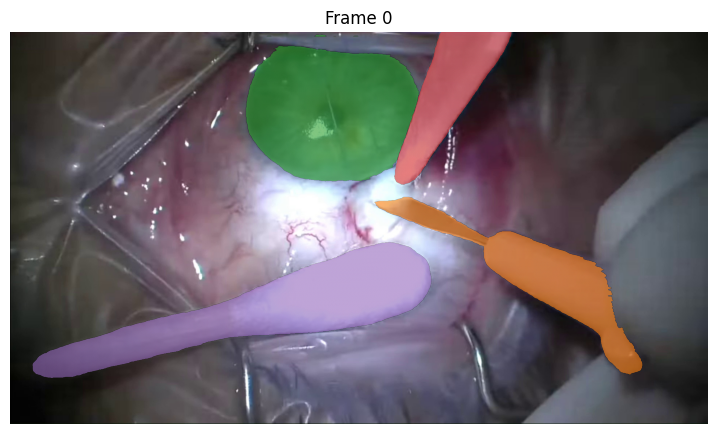

In [33]:
Visualize(0)

Propagate each object's mask through the video, showing every **10th frame** for quick visual

propagate in video: 100%|██████████| 100/100 [00:31<00:00,  3.17it/s]


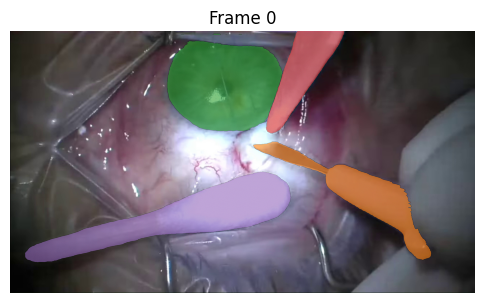

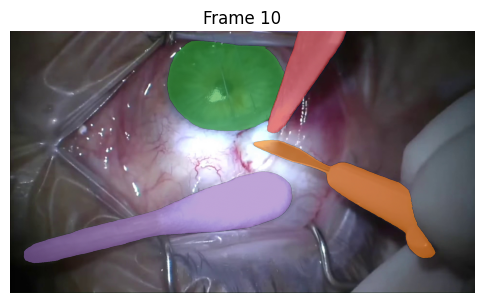

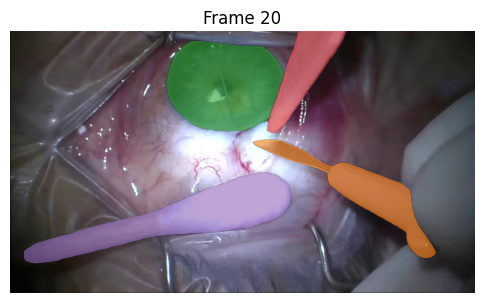

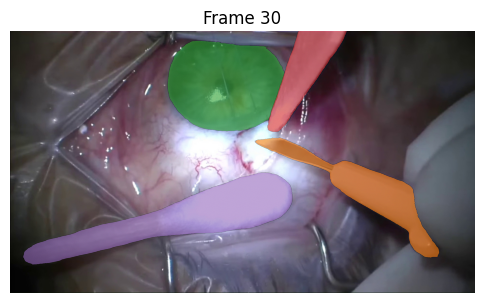

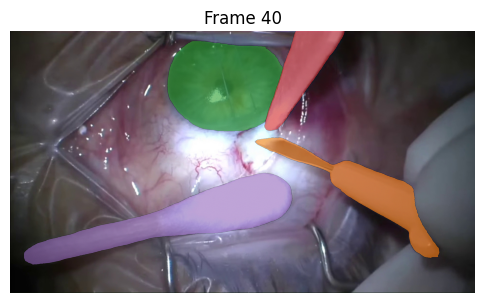

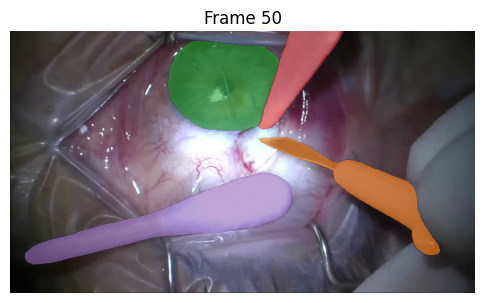

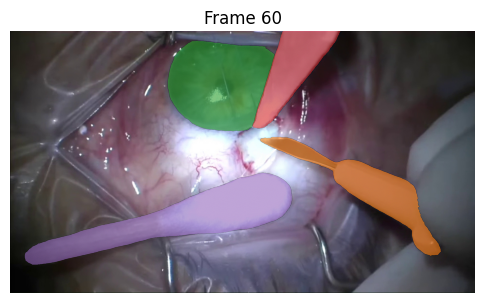

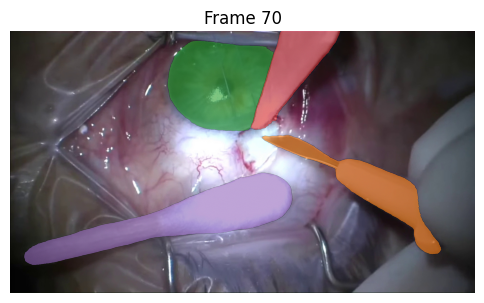

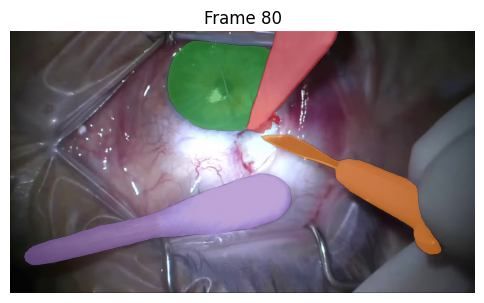

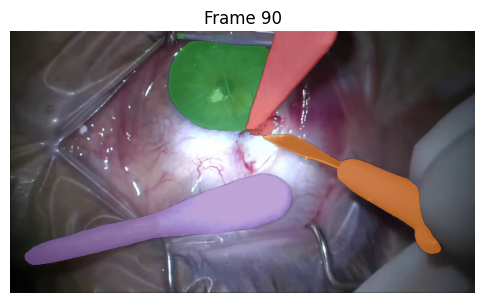

✅ Propagation done – stored masks for 100 frames.


In [34]:
Propagate(10)

← Export **one PNG per object per frame** into the `masks/` folder

In [35]:
Masks("/content/drive/My Drive/masks")

✅  Saved masks → /content/drive/My Drive/masks


  ← Clear **all** inference state, click buffers, and widget markers (start fresh)

In [36]:
Reset()

🧹 Workspace reset. Ready to annotate a new object.
